In [7]:
def get_unfoldings(d):
    """iterator that returns all pairings
    
    A pairing is a tree T on 2*d nodes together with perfect matchings in the complement T
    up to automorphims of T."""
    def get_all_perms(G, p):
        """returns the orbit of p under the action of G"""
        returnset=set([])
        for per in G:
            returnset.add(frozenset([frozenset(map(lambda x: per(x), _)) for _ in p]))
        return returnset
    
    
    for i, t in enumerate(graphs.trees(2*d)):
        pairlist = []
        T=t.copy(immutable=True)
        G=T.automorphism_group()
        seen_matchings = set([])
        for p in T.complement().perfect_matchings():
            fp = frozenset([frozenset(_) for _ in p])
            if fp not in seen_matchings:
                seen_matchings=seen_matchings.union(get_all_perms(G,fp))
                pairlist = pairlist +[fp]
        for pair in pairlist:
            yield (T, pair)


In [8]:
def complete_map(part_dict, fixed, d):
    "extends a map from partial embedding to one more cube"
    comp_dict = {}
    [flipkindex] =  [i for i in range(d) if i!=fixed and len(set([_[i] for _ in part_dict.keys()]))==1]
    flipkvalue = part_dict.keys()[0][flipkindex]
    assert set([flipkvalue]) == set([_[flipkindex] for _ in part_dict.keys()])
    [flipvindex] =  [i for i in range(d-1) if  len(set([_[i] for _ in part_dict.values()]))==1]
    flipvvalue = part_dict.values()[0][flipvindex]
    assert set([flipvvalue]) == set([_[flipvindex] for _ in part_dict.values()])
    for k,v in part_dict.iteritems():
        vlist = list(v)
        vlist[flipvindex] = str(1 - int(flipvvalue))
        newv = ''.join(vlist)
        comp_dict[k] = newv
        klist = list(k)
        klist[flipkindex] = str(1 - int(flipkvalue))
        newk = ''.join(klist)
        comp_dict[newk] = v
        
    return comp_dict


def get_embedding(T, p):
    """gets an embedding of the pairing T,p, modelled after 
    http://unfolding.apperceptual.com/
    """
    G = Graph()
    G.add_edges(p)
    d = int(T.num_verts()/2)

    F = Graph()
    F.add_edges([[('*'*(d-1))[:i]+'0'+('*'*(d-1))[i:],('*'*(d-1))[:i]+'1'+('*'*(d-1))[i:]] for i in range(d)])
    has, H = G.is_isomorphic(F, certificate=True)
    embedding = {}
    for v in T.depth_first_search(0):
        fixedi = list(H[v]).index('0') if '0' in H[v] else list(H[v]).index('1')
        #print fixedi
        fixedv = H[v][fixedi]
        if embedding == {}:

            firstcube = {}
            for cv in graphs.CubeGraph(d).vertices():
                if cv[fixedi]==fixedv:
                    firstcube[cv] = cv[:fixedi]+cv[fixedi+1:]
            embedding[v] = (H[v], [0]*(d-1), firstcube)
        else:
            w, = [_ for _ in list(set(embedding.keys()).intersection(T.neighbors(v)))]
            wfixedi = list(H[w]).index('0') if '0' in H[w] else list(H[w]).index('1')
            wfixedv = H[w][fixedi]
            part_dict = {}
            for ke, va in embedding[w][2].iteritems():
                if ke[fixedi] == fixedv:
                    part_dict[ke] = va

            [otherfixed] =  [i for i in range(d) if i!=fixedi and len(set([_[i] for _ in part_dict.keys()]))==1]        
            otherfixedvalue = part_dict.keys()[0][otherfixed]
            assert set([otherfixedvalue]) == set([_[otherfixed] for _ in part_dict.keys()])
            [ridge] =  [i for i in range(d-1) if  len(set([_[i] for _ in part_dict.values()]))==1]        
            ridgevalue = part_dict.values()[0][ridge]
            assert set([ridgevalue]) == set([_[ridge] for _ in part_dict.values()])
            offsetoffset = [0]*(d-1)
            offsetoffset[ridge] = 2*ZZ(ridgevalue)-1
            embedding[v] = (H[v], vector(embedding[w][1]) + vector(offsetoffset) , complete_map(part_dict, fixedi, d))
    return embedding

In [9]:
d=4
pairs = list(get_unfoldings(d))

In [10]:
for T,p in pairs:
    embedding = get_embedding(T, p)
    print [_[1] for _ in embedding.values()]


[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, 0, -3), (0, -1, -3), (-1, 0, 0), (-1, 1, 0), (-1, 2, 0)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -2), (0, -1, -3), (-1, 0, 0), (-1, 1, 0), (-1, 2, 0)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -2), (-1, -1, -2), (0, 0, 1), (0, 1, 1), (1, 1, 1)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -2), (-1, -1, -2), (0, 0, 1), (1, 0, 1), (1, 1, 1)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -2), (-1, -1, -2), (0, 1, 0), (0, 1, 1), (1, 1, 1)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -2), (-1, -1, -2), (1, 0, 0), (1, 0, 1), (1, 1, 1)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -2), (-1, -1, -2), (0, 1, 0), (1, 1, 0), (1, 1, 1)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -2), (-1, -1, -2), (1, 0, 0), (1, 1, 0), (1, 1, 1)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (0, -1, -2), (0, -2, -2), (-1, 0, 0), (-1, 1, 0), (-1, 2, 0)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (0, -1, -2), (0, -1, -3), (-1, 0, 0), (-1, 0, 1), (-1, 0, 2)]
[[0, 0, 0], (0, 0, -1), (0, -1,

[[0, 0, 0], (0, 0, -1), (0, -1, -1), (0, -2, -1), (-1, 0, -1), (0, 1, 0), (0, 2, 0), (1, 1, 0)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (0, -2, -1), (-1, 0, -1), (1, 0, 0), (2, 0, 0), (1, 1, 0)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (-1, -1, -1), (0, 1, -1), (0, 0, 1), (0, 0, 2), (1, 0, 1)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (-1, -1, -1), (1, 0, -1), (0, 0, 1), (0, 0, 2), (0, 1, 1)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (-1, -1, -1), (0, 1, -1), (1, 0, 0), (2, 0, 0), (1, 0, 1)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (-1, -1, -1), (1, 0, -1), (0, 1, 0), (0, 2, 0), (0, 1, 1)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, 0, -3), (0, -1, -1), (0, 1, 0), (-1, 1, 0), (1, 0, 0)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, 0, -3), (0, -1, -1), (-1, 0, 0), (-1, 1, 0), (1, 0, 0)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -2), (0, 1, -1), (0, 0, 1), (-1, 0, 1), (1, 0, 0)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -2), (-1, 0, -1), (0, 0, 1), (0, 1, 1), (1, 0, 0)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1,

[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -1), (0, 1, 0), (-1, 1, 0), (1, 1, 0), (0, 0, 1)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -1), (0, 0, 1), (-1, 0, 1), (0, 1, 0), (1, 1, 0)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -1), (0, 0, 1), (-1, 0, 1), (1, 0, 0), (1, 1, 0)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -1), (-1, 0, 0), (-1, 0, 1), (0, 1, 0), (1, 1, 0)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -1), (-1, 0, 0), (-1, 0, 1), (1, 0, 0), (1, 1, 0)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (-1, 0, -1), (0, 0, 1), (0, 0, 2), (0, 1, 0), (1, 1, 0)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (0, 1, -1), (-1, 0, 0), (-2, 0, 0), (0, 0, 1), (1, 0, 1)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (-1, 0, -1), (0, 1, 0), (0, 2, 0), (0, 0, 1), (1, 0, 1)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (0, 1, -1), (-1, 0, 0), (-2, 0, 0), (1, 0, 0), (1, 0, 1)]
[[0, 0, 0], (0, 0, -1), (0, -1, -1), (-1, 0, -1), (0, 1, 0), (0, 2, 0), (1, 0, 0), (1, 0, 1)]
[[0, 0, 0], (0, 0, -1), (0, 0, -2), (0, -1, -1), (0, 0, 

In [11]:
T, p  = choice(pairs)
embedding = get_embedding(T,p)
summe = sum([cube(_[1], .94) for _ in embedding.values()])
summe.show(axes=False, frame=False, viewer ="threejs")

Graphics3d Object

In [12]:
alle = [[list(_[1]) for _ in get_embedding(T,p).values()] for T,p in pairs]

In [13]:
time len(list(get_unfoldings(5)))

CPU times: user 12.7 s, sys: 89.5 ms, total: 12.8 s
Wall time: 13.4 s


9694

In [14]:
n_unfoldings = {3:11, 4:261, 5: 9694, 6: 502110, 7: 33064966}

In [15]:
oeis([n_unfoldings[i] for i in range(3,5)])

0: A268922: One of the two successive approximations up to 5^n for the 5-adic integer sqrt(-4). These are the 1 mod 5 numbers, except for n = 0.
1: A091159: Number of distinct nets for the n-hypercube.

Graph on 6 vertices frozenset([frozenset([3, 5]), frozenset([1, 4]), frozenset([0, 2])])


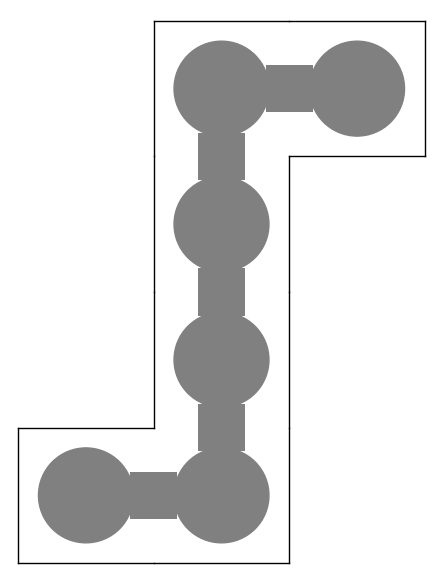

Graph on 6 vertices frozenset([frozenset([3, 4]), frozenset([1, 5]), frozenset([0, 2])])


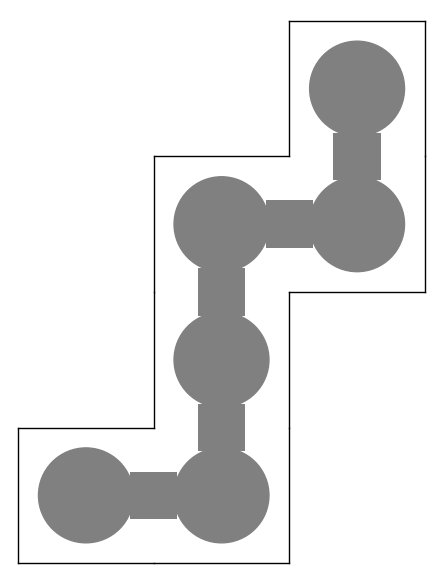

Graph on 6 vertices frozenset([frozenset([2, 4]), frozenset([1, 5]), frozenset([0, 3])])


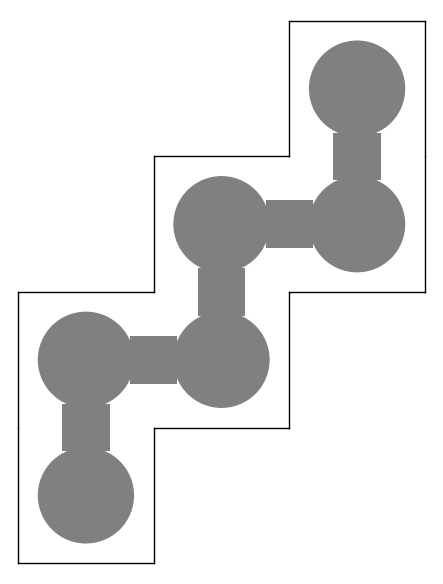

Graph on 6 vertices frozenset([frozenset([1, 3]), frozenset([2, 4]), frozenset([0, 5])])


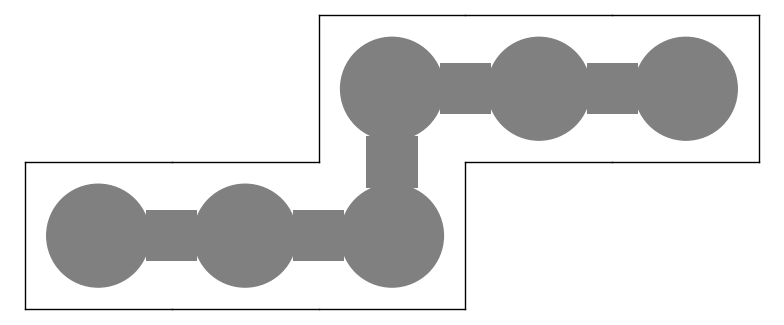

Graph on 6 vertices frozenset([frozenset([3, 5]), frozenset([1, 4]), frozenset([0, 2])])


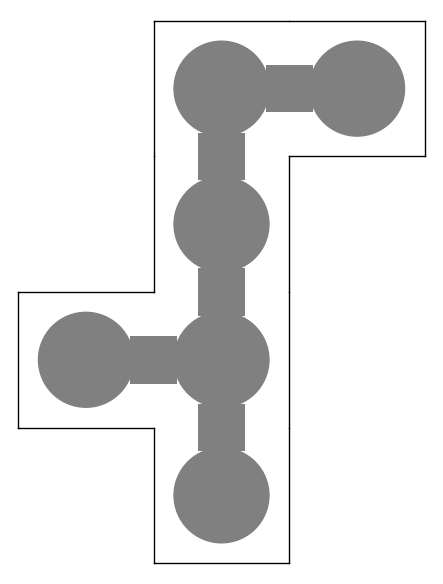

Graph on 6 vertices frozenset([frozenset([3, 4]), frozenset([1, 5]), frozenset([0, 2])])


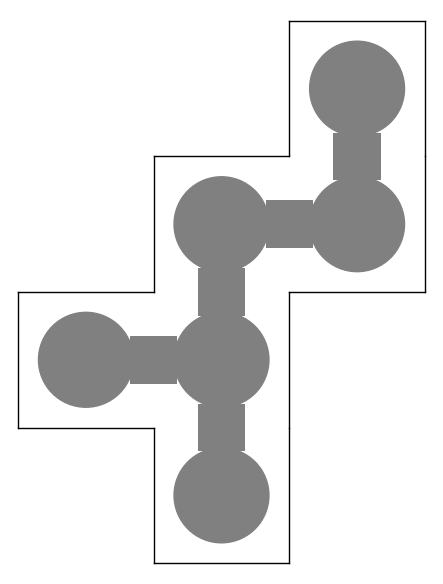

Graph on 6 vertices frozenset([frozenset([2, 3]), frozenset([0, 5]), frozenset([1, 4])])


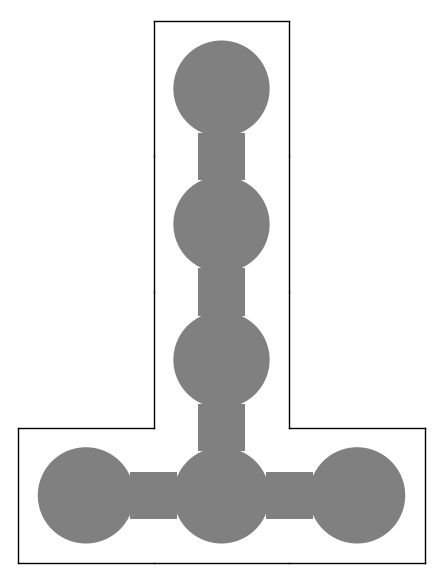

Graph on 6 vertices frozenset([frozenset([3, 5]), frozenset([1, 4]), frozenset([0, 2])])


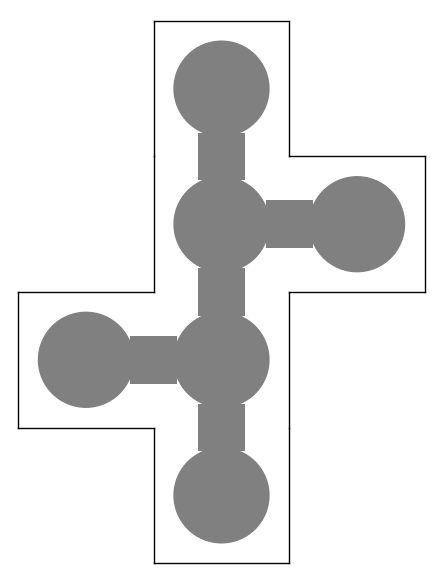

Graph on 6 vertices frozenset([frozenset([1, 3]), frozenset([0, 2]), frozenset([4, 5])])


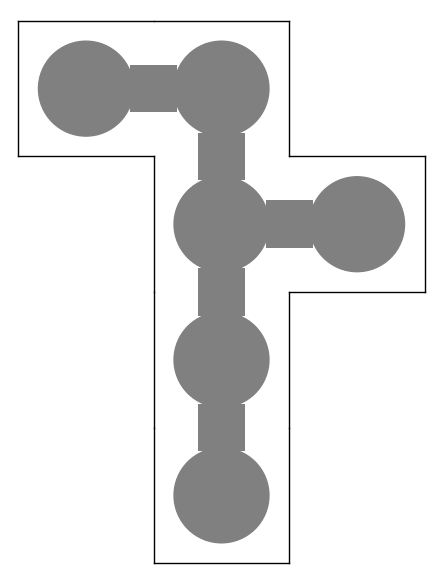

Graph on 6 vertices frozenset([frozenset([3, 5]), frozenset([1, 4]), frozenset([0, 2])])


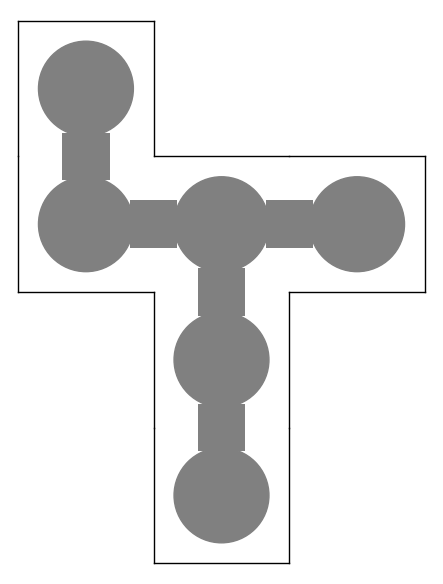

Graph on 6 vertices frozenset([frozenset([1, 3]), frozenset([0, 2]), frozenset([4, 5])])


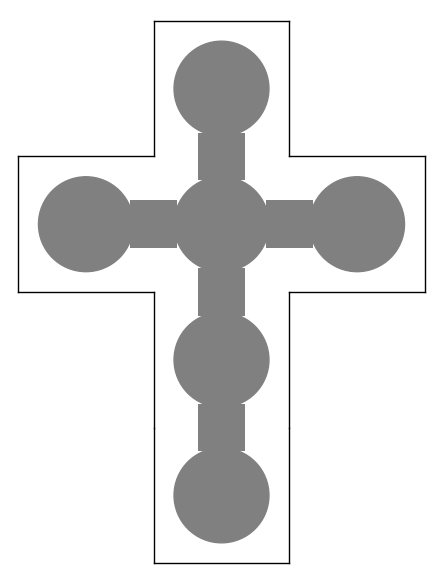

In [16]:
from sage.combinat.tiling import  Polyomino
for T,p in get_unfoldings(3):
    print T, p
    Polyomino([_[1] for _ in get_embedding(T,p).values()]).show2d().show(axes=false)